In [2]:
import pandas as pd
import numpy as np
import pickle
import os
import scipy.signal as scisig
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import neurokit2 as nk
from biosppy.signals import ecg, resp

sns.set_palette("colorblind")

ModuleNotFoundError: No module named '_tkinter'

In [4]:
file_name = "./WESAD/S2/S2"
# data_set + '/S2.pkl'2
with open(f"{file_name}.pkl", 'rb') as f:
    s_data = pickle.load(f, encoding="latin1")
    #t(s2_data)

In [7]:
s_data

{'signal': {'chest': {'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
          [ 0.92579997, -0.2216    , -0.55379999],
          [ 0.90820003, -0.21960002, -0.53920001],
          ...,
          [ 0.87179995, -0.12379998, -0.30419999],
          [ 0.87300003, -0.12339997, -0.30260003],
          [ 0.87020004, -0.12199998, -0.30220002]]),
   'ECG': array([[ 0.02142334],
          [ 0.02032471],
          [ 0.01652527],
          ...,
          [-0.00544739],
          [ 0.00013733],
          [ 0.0040741 ]]),
   'EMG': array([[-0.00444031],
          [ 0.00434875],
          [ 0.00517273],
          ...,
          [-0.01716614],
          [-0.02897644],
          [-0.02357483]]),
   'EDA': array([[5.25054932],
          [5.26733398],
          [5.24330139],
          ...,
          [0.36048889],
          [0.36582947],
          [0.365448  ]]),
   'Temp': array([[30.120758],
          [30.129517],
          [30.138214],
          ...,
          [31.459229],
          [31.484283

In [5]:
dataframe = pd.DataFrame(s_data['signal']['chest']['Temp'])
dataframe.head()

,0
0,30.120758
1,30.129517
2,30.138214
3,30.129517
4,30.130951


#### Sampling de datos


In [6]:
sampling_dict = {'ACC': 32, 'BVP': 64, 'EDA': 4, 'TEMP': 4, 'label': 700, 'Resp': 700}

### La información de las personas se detectan
- signal
- label
- subject

In [8]:
s_data.keys()

dict_keys(['signal', 'label', 'subject'])

### La información de las personas en data['signal'] se detectan
- 'chest' pecho
- 'wrist' muñeca

In [9]:
data_signal = s_data['signal']
data_signal.keys()

dict_keys(['chest', 'wrist'])

#### Tipo chest and wrist

In [10]:
data_chest = s_data['signal']['chest']
#df_chest_acc = pd.DataFrame(data_chest)
data_chest.keys()

dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])

In [11]:
data_wrist = s_data['signal']['wrist']
data_wrist.keys()
#data_signal.keys()

dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

### Tipo de label (ndarray,[0..,7])

In [12]:
data_label = s_data['label']
df_label = pd.DataFrame(data_label)
df_label.value_counts(normalize=True)
# Vamos a usar 1 , 2 y 3, 4 es meditación
#df_label.shape

0    0.503537
1    0.188189
4    0.126336
2    0.101168
3    0.059549
6    0.010693
7    0.010528
dtype: float64

<BarContainer object of 3 artists>

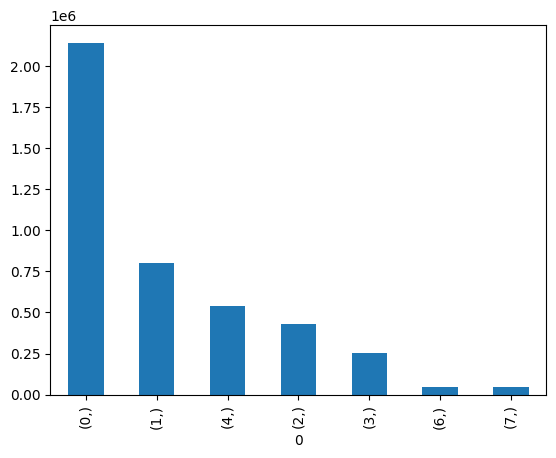

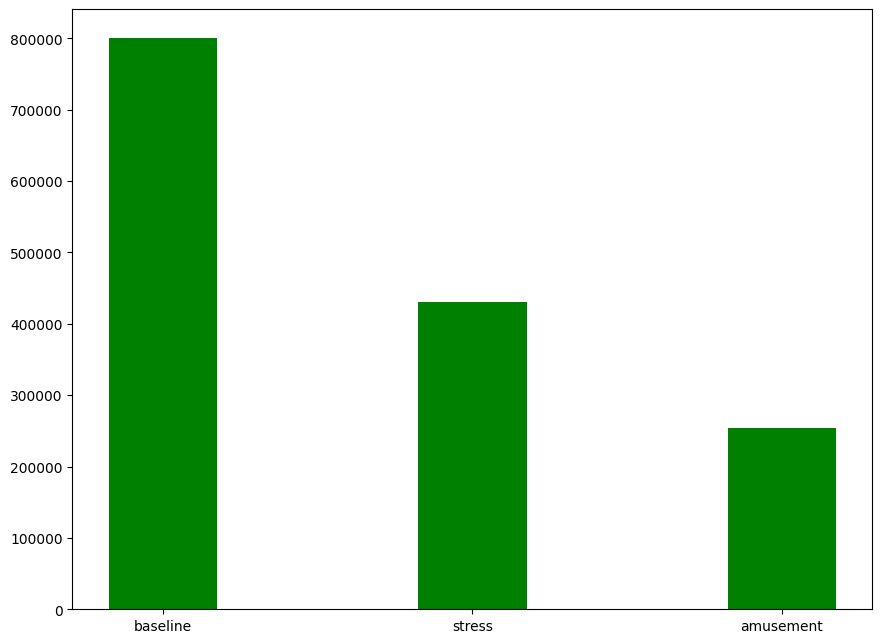

In [13]:
# Baseline: 1
# Estres : 2
# Amusement: 3
baseline_l = np.nonzero(s_data['label']==1)[0]
stress_l = np.nonzero(s_data['label']==2)[0]
amusement_l = np.nonzero(s_data['label']==3)[0]
df_label.value_counts().plot.bar()
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([1,1,2,2])
langs = ["baseline", "stress", "amusement"]
y_ax = [len(baseline_l),len(stress_l),len(amusement_l)]
ax.bar(langs,y_ax,color = 'g', width = 0.35)

### Tipo de sujeto (str, un solo elemento)

In [14]:
data_subject = s_data['subject']
data_subject

'S2'

In [15]:
class Subject:
    def __init__(self, path, subject_id):
        self.id = 'S'+ str(subject_id) + '/'+ f'S{subject_id}' + '.pkl'
        self.path = os.path.join(path,self.id)
        self.init_keys   = ['signal', 'label', 'subject']
        self.signal_keys = [ 'chest', 'wrist']
        self.signal_chest_keys = ['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']
        self.signal_wrist_keys = ['ACC', 'BVP', 'EDA', 'TEMP']
        self.label_keys  = ['label']
        print(self.path)
        with open(self.path,'rb') as file_read:
            self.data = pickle.load(file_read, encoding="latin1")
        self.label = self.data['label']
        self.chest = self.data['signal']['chest']
        self.wrist = self.data['signal']['wrist']


    def get_chest_data(self):
        return self.chest
    def get_label_data(self):
        return self.data['label']
    
    def get_wrist_data(self):
        data = self.data['signal']['wrist']
        data.update({'Resp': self.data['signal']['chest']['Resp']})
        return data


In [16]:
subject3 = Subject("./WESAD/", 4)
subject_wrist = subject3.get_wrist_data()
subject_chest = subject3.get_chest_data()
subject_label = subject3.get_label_data()

./WESAD/S4/S4.pkl


In [17]:

def hist():
    j = 1
    for i in range(2,17+1):
        if i == 12:
            continue
        else:
            subject = Subject("./WESAD/", i)
            subject_label = subject.get_label()
            baseline_indices = np.where(subject_label == 1)[0]
            stress_indices = np.where(subject_label == 2)[0]
            amusement_indices = np.where(subject_label == 3)[0]
            meditation_indices = np.where(subject_label == 4)[0]
            subject_label = pd.DataFrame(subject_label)
            #subject_label.value_counts().plot.bar()
            fig = plt.figure(figsize=(4,3))
            #plt.subplot(5, 3, j)
            font1 = {'family':'serif','color':'blue','size':20}
            font2 = {'family':'serif','color':'darkred','size':15}
            ax = fig.add_axes([1,1,2,2])
            langs = ["baseline", "stress", "amusement","meditation"]
            y_ax = [len(baseline_indices),len(stress_indices),len(amusement_indices)]
            ax.bar(langs,y_ax,color = 'g', width = 0.35)
            plt.title(f"Subject {i}",fontdict=font1)
            plt.ylabel("Cantidad de datos", fontdict = font2)
            plt.show()
            j = j+1
# El comportamiento es similar para todos los sujetos
#hist()

In [61]:
"""

ACC: Accelerometer
ECG:  Electrocardiogram 
EMG:  Electromyogram
EDA:  Electrodermal Activity
Temp: Temperature
BVP:  Blood Volume Pulse
TEMP: Temperature

"""
c_ax=subject_chest['ACC'][0:,0]
c_ay=subject_chest['ACC'][0:,1]
c_az=subject_chest['ACC'][0:,2]
c_ecg=subject_chest['ECG'][:,0]
c_emg=subject_chest['EMG'][:,0]
c_eda=subject_chest['EDA'][:,0]
c_temp=subject_chest['Temp'][:,0]
c_resp=subject_chest['Resp'][:,0]
w_ax=subject_wrist['ACC'][0:,0]
w_ay=subject_wrist['ACC'][0:,1]
w_az=subject_wrist['ACC'][0:,2]
w_bvp=subject_wrist['BVP'][:,0]
w_eda=subject_wrist['EDA'][:,0]
w_temp=subject_wrist['TEMP'][:,0]
w_label=subject_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

### Analizando dimensionalidad del Respiban Profesional 'chest'

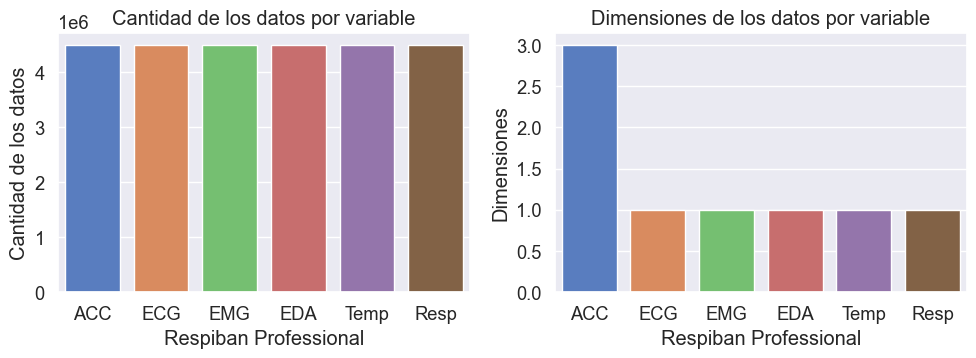

ACC:(4496100, 3)
ECG:(4496100, 1)
EMG:(4496100, 1)
EDA:(4496100, 1)
Temp:(4496100, 1)
Resp:(4496100, 1)


In [19]:
%matplotlib inline

d_acc_c=subject_chest['ACC'].shape
d_ecg_c=subject_chest['ECG'].shape
d_emg_c=subject_chest['EMG'].shape
d_eda_c=subject_chest['EDA'].shape
d_temp_c=subject_chest['Temp'].shape
d_resp_c=subject_chest['Resp'].shape

respiban_professional = ['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']
d_n = [d_acc_c[0], d_ecg_c[0], d_emg_c[0], d_eda_c[0], d_temp_c[0], d_resp_c[0]]
dimensiones = [d_acc_c[1], d_ecg_c[1], d_emg_c[1], d_eda_c[1], d_temp_c[1], d_resp_c[1]]

sns.set(palette='muted', font_scale=1.2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x=respiban_professional, y=d_n, ax=axs[0])
axs[0].set_xlabel('Respiban Professional')
axs[0].set_ylabel('Cantidad de los datos')
axs[0].set_title('Cantidad de los datos por variable')


sns.barplot(x=respiban_professional, y=dimensiones, ax=axs[1])
axs[1].set_xlabel('Respiban Professional')
axs[1].set_ylabel('Dimensiones')
axs[1].set_title('Dimensiones de los datos por variable')

#axs[1].set_ylim(bottom=0, top=max(max(max(dimensiones))) * 1.1)

plt.tight_layout()
plt.show()
print(f'ACC:{d_acc_c}\nECG:{d_ecg_c}\nEMG:{d_emg_c}\nEDA:{d_eda_c}\nTemp:{d_temp_c}\nResp:{d_resp_c}')

### Analizando dimensionalidad del Empatica E4 'wrist'

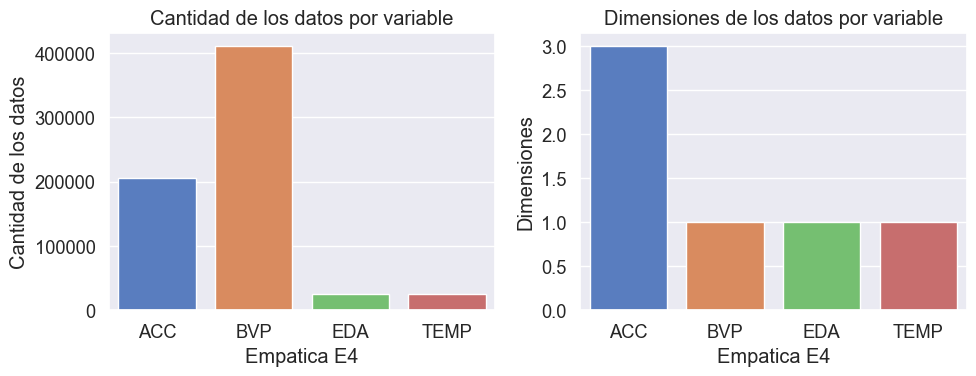

ACC:(205536, 3)
ECG:(411072, 1)
EMG:(25692, 1)
EDA:(25692, 1)


In [20]:
%matplotlib inline

d_acc_w=subject_wrist['ACC'].shape
d_bvp_w=subject_wrist['BVP'].shape
d_eda_w=subject_wrist['EDA'].shape
d_temp_w=subject_wrist['TEMP'].shape

empatica_E4 = ['ACC', 'BVP', 'EDA', 'TEMP']
d_n_w = [d_acc_w[0], d_bvp_w[0], d_eda_w[0], d_temp_w[0]]
dimensiones_w = [d_acc_w[1], d_bvp_w[1], d_eda_w[1], d_temp_w[1]]

sns.set(palette='muted', font_scale=1.2)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x=empatica_E4, y=d_n_w, ax=axs[0])
axs[0].set_xlabel('Empatica E4')
axs[0].set_ylabel('Cantidad de los datos')
axs[0].set_title('Cantidad de los datos por variable')


sns.barplot(x=empatica_E4, y=dimensiones_w, ax=axs[1])
axs[1].set_xlabel('Empatica E4')
axs[1].set_ylabel('Dimensiones')
axs[1].set_title('Dimensiones de los datos por variable')

#axs[1].set_ylim(bottom=0, top=max(max(max(dimensiones))) * 1.1)

plt.tight_layout()
plt.show()
print(f'ACC:{d_acc_w}\nECG:{d_bvp_w}\nEMG:{d_eda_w}\nEDA:{d_temp_w}')


#### Uniendo Datos del pecho 'chest' para pasarlo a dataframe

In [21]:
# Datos del pecho 'chest', la dimensionalidad 
numpy_tmp_array_chest=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_transpose_chest=numpy_tmp_array_chest.transpose()
numpy_transpose_chest.shape

(4496100, 9)

##### Quitando del dataframe estados diferentes de 1(baseline) 2(Stress) 3(Amusement)

In [22]:
df_chest = pd.DataFrame(data=numpy_transpose_chest, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","mode"]) 
df_chest["mode"] = df_chest["mode"].astype(int)
df_chest = df_chest[ (df_chest["mode"] != 0) & (df_chest["mode"] != 5) & (df_chest["mode"] != 6) & (df_chest["mode"] != 7) ]
df_chest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079001 entries, 199705 to 4251305
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   c_ax    float64
 1   c_ay    float64
 2   c_az    float64
 3   c_ecg   float64
 4   c_emg   float64
 5   c_eda   float64
 6   c_temp  float64
 7   c_resp  float64
 8   mode    int64  
dtypes: float64(8), int64(1)
memory usage: 158.6 MB


In [23]:
df_chest.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,mode
199705,0.6746,-0.2214,-0.6216,0.009567,0.011215,1.343536,32.681061,-2.406311,1
199706,0.6742,-0.2198,-0.6236,0.003525,0.021652,1.316452,32.694519,-2.383423,1
199707,0.6752,-0.2216,-0.6274,-0.000046,0.030212,1.325989,32.657135,-2.360535,1
199708,0.6770,-0.2240,-0.6322,0.001968,0.012039,1.280975,32.691559,-2.345276,1
199709,0.6760,-0.2230,-0.6282,0.001144,0.020920,1.357651,32.678101,-2.320862,1


In [24]:
#pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_chest.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,mode
count,2.079001e+06,2.079001e+06,2.079001e+06,2.079001e+06,2.079001e+06,2.079001e+06,2.079001e+06,2.079001e+06,2.079001e+06
mean,7.208095e-01,-2.584369e-01,-4.890152e-01,1.270633e-03,-2.252239e-03,2.083546e+00,3.316815e+01,5.401951e-02,2.277440e+00
std,1.304610e-01,1.485660e-01,2.221196e-01,2.334158e-01,1.063033e-02,1.167023e+00,3.826040e-01,1.940149e+00,1.233837e+00
min,4.114000e-01,-6.222000e-01,-9.624000e-01,-8.724518e-01,-1.468506e-01,9.120941e-01,3.239438e+01,-1.143341e+01,1.000000e+00
25%,5.998000e-01,-4.190000e-01,-7.354000e-01,-7.218933e-02,-8.010864e-03,1.285553e+00,3.283081e+01,-1.014709e+00,1.000000e+00
50%,7.178000e-01,-1.852000e-01,-5.014000e-01,-2.325439e-02,-1.739502e-03,1.392746e+00,3.298080e+01,-4.730225e-02,2.000000e+00
75%,8.594000e-01,-1.474000e-01,-2.594000e-01,7.369995e-03,3.707886e-03,2.531815e+00,3.363373e+01,1.168823e+00,4.000000e+00
max,1.066200e+00,1.095999e-01,3.966000e-01,1.499954e+00,2.032928e-01,5.183029e+00,3.394333e+01,1.545563e+01,4.000000e+00


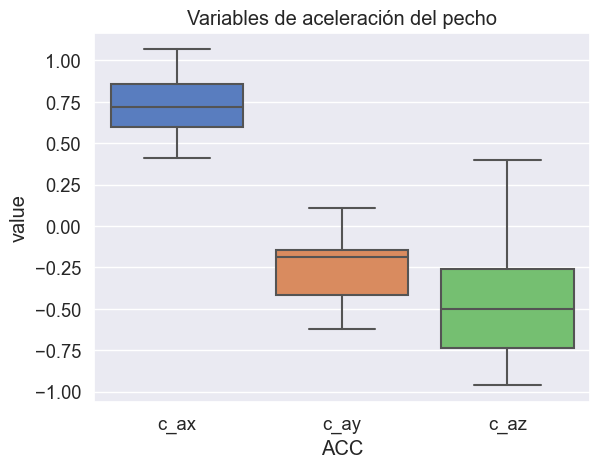

<Figure size 300x300 with 0 Axes>

In [25]:
%matplotlib inline

sns.boxplot(x="variable",y ="value",data=pd.melt(df_chest[['c_ax','c_ay','c_az']]))
plt.title('Variables de aceleración del pecho')
plt.xlabel('ACC')
plt.figure(figsize=(3, 3))
plt.show()

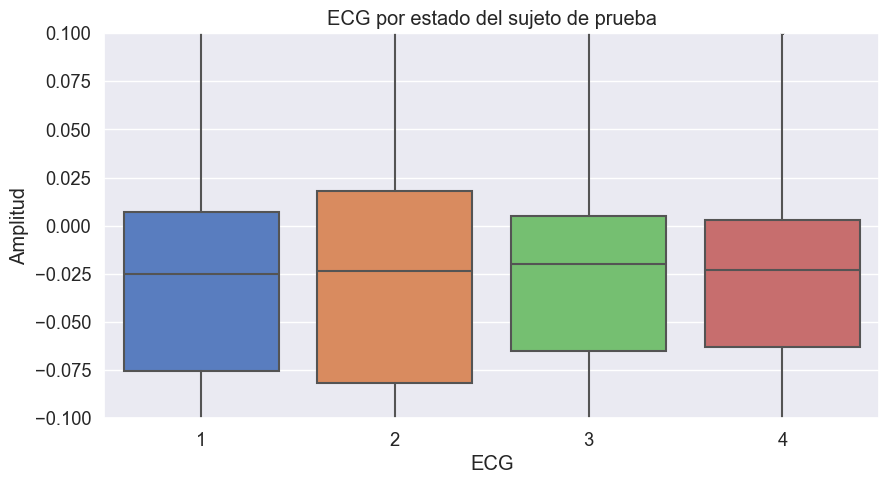

In [26]:
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.ylim([-0.1,0.1]) # -1,1
sns.boxplot(x=df_chest["mode"],y=df_chest['c_ecg'])
plt.title('ECG por estado del sujeto de prueba')
plt.xlabel('ECG')
plt.ylabel('Amplitud')
plt.show()

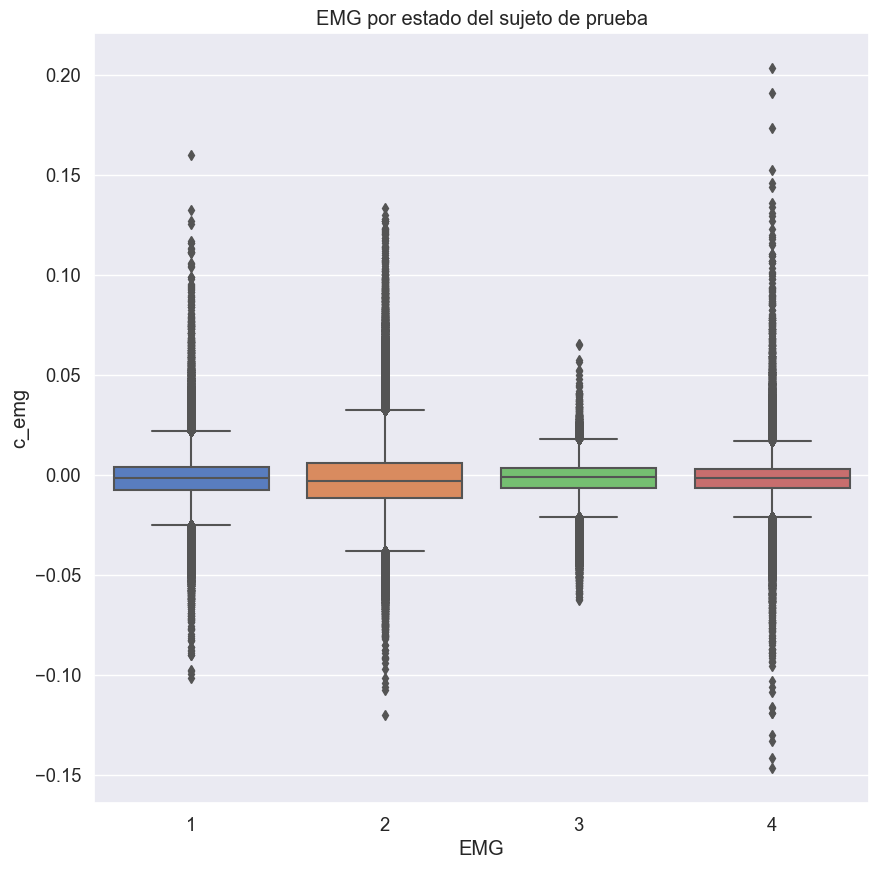

In [27]:
%matplotlib inline
plt.figure(figsize=(10,10 ))
sns.boxplot(x=df_chest["mode"],y=df_chest['c_emg'])
plt.title('EMG por estado del sujeto de prueba')
plt.xlabel('EMG')
plt.show()

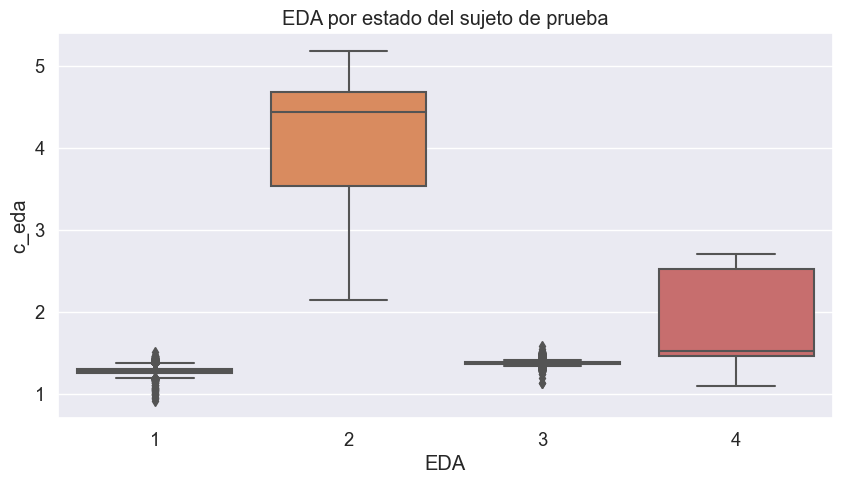

In [28]:
%matplotlib inline
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_chest["mode"],y=df_chest['c_eda'])
plt.title('EDA por estado del sujeto de prueba')
plt.xlabel('EDA')
plt.show()

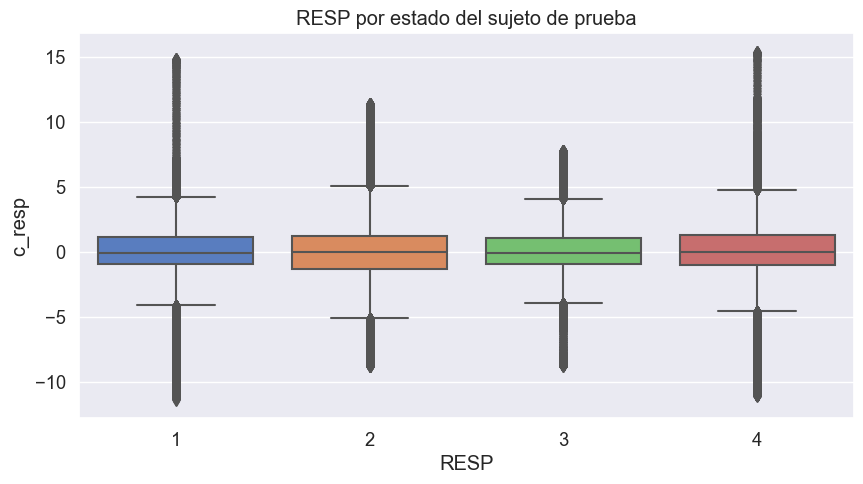

In [29]:
%matplotlib inline
plt.figure(figsize=(10, 5))
#plt.ylim([-1,1]) # -1,1
sns.boxplot(x=df_chest["mode"],y=df_chest['c_resp'])
plt.title('RESP por estado del sujeto de prueba')
plt.xlabel('RESP')
plt.show()

##### Remove outliers

In [30]:
# Obteniendo 2 desviaciones estándar
df_chest_filter = df_chest[(np.abs(stats.zscore(df_chest)) < 2).all(axis=1)]

df_chest_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679209 entries, 199705 to 4249595
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   c_ax    1679209 non-null  float64
 1   c_ay    1679209 non-null  float64
 2   c_az    1679209 non-null  float64
 3   c_ecg   1679209 non-null  float64
 4   c_emg   1679209 non-null  float64
 5   c_eda   1679209 non-null  float64
 6   c_temp  1679209 non-null  float64
 7   c_resp  1679209 non-null  float64
 8   mode    1679209 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 128.1 MB


### Análisis post-remove outliers

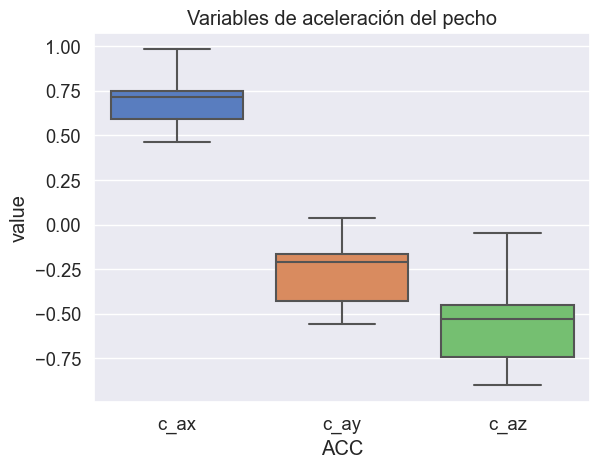

<Figure size 300x300 with 0 Axes>

In [31]:
%matplotlib inline

sns.boxplot(x="variable",y ="value",data=pd.melt(df_chest_filter[['c_ax','c_ay','c_az']]))
plt.title('Variables de aceleración del pecho')
plt.xlabel('ACC')
plt.figure(figsize=(3, 3))
plt.show()

##### Antes de remover outliers

In [32]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_chest.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,mode
count,2079001.00000,2079001.00000,2079001.00000,2079001.00000,2079001.00000,2079001.00000,2079001.00000,2079001.00000,2079001.00000
mean,0.72081,-0.25844,-0.48902,0.00127,-0.00225,2.08355,33.16815,0.05402,2.27744
std,0.13046,0.14857,0.22212,0.23342,0.01063,1.16702,0.38260,1.94015,1.23384
min,0.41140,-0.62220,-0.96240,-0.87245,-0.14685,0.91209,32.39438,-11.43341,1.00000
25%,0.59980,-0.41900,-0.73540,-0.07219,-0.00801,1.28555,32.83081,-1.01471,1.00000
50%,0.71780,-0.18520,-0.50140,-0.02325,-0.00174,1.39275,32.98080,-0.04730,2.00000
75%,0.85940,-0.14740,-0.25940,0.00737,0.00371,2.53181,33.63373,1.16882,4.00000
max,1.06620,0.10960,0.39660,1.49995,0.20329,5.18303,33.94333,15.45563,4.00000


##### Después de remover outliers

In [33]:
# Para redir el largo de la impresión de los decimales
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_chest_filter.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,mode
count,1679209.00000,1679209.00000,1679209.00000,1679209.00000,1679209.00000,1679209.00000,1679209.00000,1679209.00000,1679209.00000
mean,0.69489,-0.28315,-0.53544,-0.03388,-0.00201,1.73787,33.09629,0.05836,2.30299
std,0.11751,0.14346,0.19594,0.08045,0.00791,0.75663,0.35477,1.38093,1.30823
min,0.46000,-0.55540,-0.90220,-0.46550,-0.02348,0.91209,32.43909,-3.82538,1.00000
25%,0.59140,-0.42620,-0.74340,-0.07210,-0.00710,1.27945,32.80682,-0.93384,1.00000
50%,0.71360,-0.21200,-0.53040,-0.02467,-0.00151,1.36452,32.96127,-0.04730,2.00000
75%,0.74980,-0.16360,-0.45100,0.00325,0.00334,2.40440,33.26361,1.08795,4.00000
max,0.98160,0.03780,-0.04500,0.46797,0.01900,4.41742,33.92966,3.93372,4.00000


In [34]:
data_global = pd.DataFrame(columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","mode"]) 
data_global

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,mode


In [35]:
# Crear una lista para almacenar los datos de los participantes
participants_data = []
# Realizar un bucle para obtener los datos de cada participante
for i in range(2, 4):  # Iterar sobre los participantes del 1 al 15
    # Obtener los datos de un participante específico
    subject = Subject("./WESAD/", i)
    subject_chest = subject.get_chest_data()
    c_ax = subject_chest['ACC'][0:, 0]
    c_ay = subject_chest['ACC'][0:, 1]
    c_az = subject_chest['ACC'][0:, 2]
    participant = f'{i}'
    mode = subject.get_label_data()
    
    numpy_tmp_array_chest=np.array([c_ax, c_ay, c_az])
    numpy_transpose_chest=numpy_tmp_array_chest.transpose()
    
    pd.concat(data_global,pd.DataFrame(data=numpy_transpose_chest, columns=["c_ax", "c_ay", "c_az"]),axis=0)
    print(data_global.shape)
    # Verificar si alguna de las variables está vacía
    if c_ax.size == 0 or c_ay.size == 0 or c_az.size == 0:
        continue

# Crear un DataFrame con los datos de todos los participantes
df = pd.DataFrame(participants_data)

./WESAD/S2/S2.pkl


/var/folders/8r/343rrfbs0gz7zy6149nd6hx40000gn/T/ipykernel_1087/3822208843.py:17: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(data_global,pd.DataFrame(data=numpy_transpose_chest, columns=["c_ax", "c_ay", "c_az"]),axis=0)


TypeError: concat() got multiple values for argument 'axis'

,mode,c_ax,c_ay,c_az
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.9553999900817871, 0.9257999658584595, 0.908...","[-0.22200000286102295, -0.2215999960899353, -0...","[-0.5579999685287476, -0.5537999868392944, -0...."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.7200000286102295, 0.5687999725341797, 0.399...","[-0.13819998502731323, -0.22860002517700195, -...","[3.1933999061584473, 3.1821999549865723, 2.944..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.5553998947143555, 1.5130000114440918, 1.446...","[-0.07840001583099365, -0.10699999332427979, -...","[1.3624000549316406, 1.4586000442504883, 1.060..."


<Axes: ylabel='Frequency'>

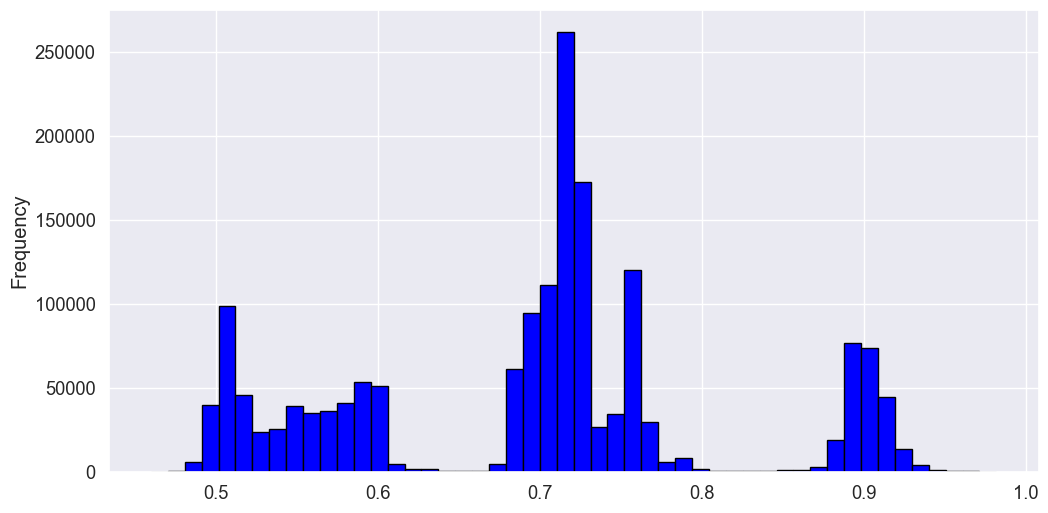

In [ ]:
df_chest_filter.c_ax.plot(kind='hist', bins=50, figsize=(12,6), facecolor='blue',edgecolor='black') 

<Axes: >

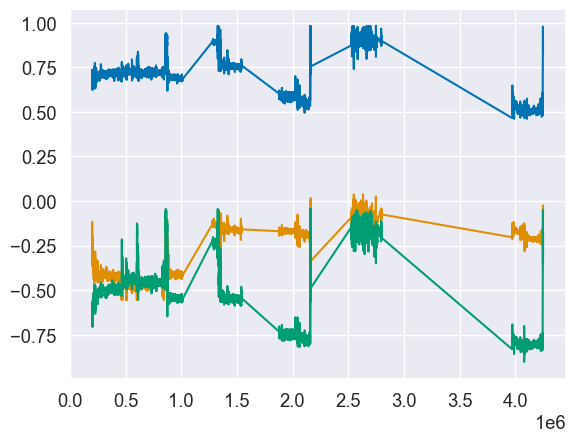

In [ ]:
df_chest_filter["c_ax"].plot()
df_chest_filter["c_ay"].plot()
df_chest_filter["c_az"].plot()
plt.plot(df_chest_filter["c_ax"])

<Axes: >

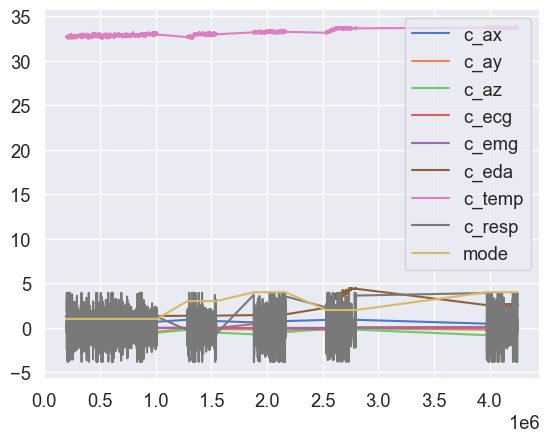

In [38]:
df_chest_filter.plot()

In [ ]:
processed_eda = nk.eda_process(signal, sampling_rate=700.0)

In [ ]:
def convert_ecg(self, signal):
        return ((signal / self.chan_bit - 0.5) * self.vcc)

def convert_eda(self, signal):
    return (((signal / self.chan_bit) * self.vcc) / 0.12)

def convert_emg(self, signal):
    return ((signal / self.chan_bit - 0.5) * self.vcc)

def convert_temp(self, signal):
    vout = (signal * self.vcc) / (self.chan_bit - 1.)
    rntc = ((10 ** 4) * vout) / (self.vcc - vout)
    return -273.15 + 1. / (1.12764514 * (10 ** (-3)) + 2.34282709 * (10 ** (-4)) * np.log(rntc) + 8.77303013 * (10 ** (-8)) * (np.log(rntc) ** 3))

def convert_acc(self, signal):
    return ((signal - self.Cmin) / (self.Cmax - self.Cmin)) * 2 - 1

def convert_resp(self, signal):
    return ((signal / self.chan_bit - 0.5) * 100)
    
df_chest_filter.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,mode
199705,0.67460,-0.22140,-0.62160,0.00957,0.01122,1.34354,32.68106,-2.40631,1
199708,0.67700,-0.22400,-0.63220,0.00197,0.01204,1.28098,32.69156,-2.34528,1
199710,0.67720,-0.22380,-0.62580,-0.00284,-0.00179,1.38206,32.69452,-2.30103,1
199714,0.67760,-0.22260,-0.63180,0.04225,-0.01598,1.28670,32.69003,-2.21405,1
199715,0.67780,-0.22320,-0.63360,0.04930,0.00975,1.28288,32.70352,-2.20337,1


In [ ]:
#df_chest_filter.describe()
processed_data, info = nk.bio_process(ecg=df_chest_filter["c_ecg"], rsp=df_chest_filter["c_resp"], eda=df_chest_filter["c_eda"],sampling_rate=700.0)


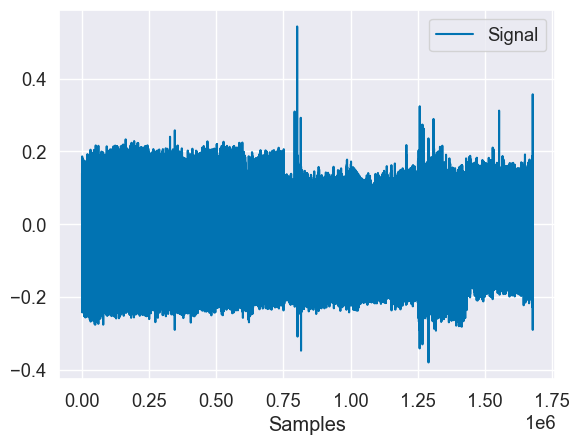

In [ ]:
nk.signal_plot(processed_data["ECG_Clean"]) 

In [ ]:
processed_data.head()

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,...,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime,RSA_P2T,RSA_Gates
0,0.00957,0.01120,67.25529,0.86063,0,0,0,0,0,0,...,0.02835,0,0,0.00000,0.00000,0.00000,0,0.00000,207.14286,8.50629
1,0.00197,0.01341,67.25529,0.86063,0,0,0,0,0,0,...,0.02737,0,0,0.00000,0.00000,0.00000,0,0.00000,207.14286,8.50629
2,-0.00284,0.01568,67.25529,0.86063,0,0,0,0,0,0,...,0.02639,0,0,0.00000,0.00000,0.00000,0,0.00000,207.14286,8.50629
3,0.04225,0.01802,67.25529,0.86063,0,0,0,0,0,0,...,0.02541,0,0,0.00000,0.00000,0.00000,0,0.00000,207.14286,8.50629
4,0.04930,0.01989,67.25529,0.86063,0,0,0,0,0,0,...,0.02443,0,0,0.00000,0.00000,0.00000,0,0.00000,207.14286,8.50629


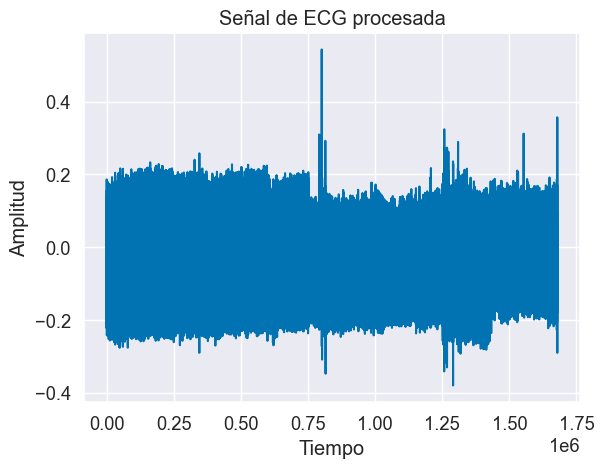

In [ ]:
ecg_signal_processed = processed_data["ECG_Clean"]

# Crear el gráfico de la señal de ECG
plt.figure()
plt.plot(ecg_signal_processed)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal de ECG procesada")
plt.show()

array([[<Axes: title={'center': 'c_ax'}>,
        <Axes: title={'center': 'c_ay'}>,
        <Axes: title={'center': 'c_az'}>],
       [<Axes: title={'center': 'c_ecg'}>,
        <Axes: title={'center': 'c_emg'}>,
        <Axes: title={'center': 'c_eda'}>],
       [<Axes: title={'center': 'c_temp'}>,
        <Axes: title={'center': 'c_resp'}>,
        <Axes: title={'center': 'mode'}>]], dtype=object)

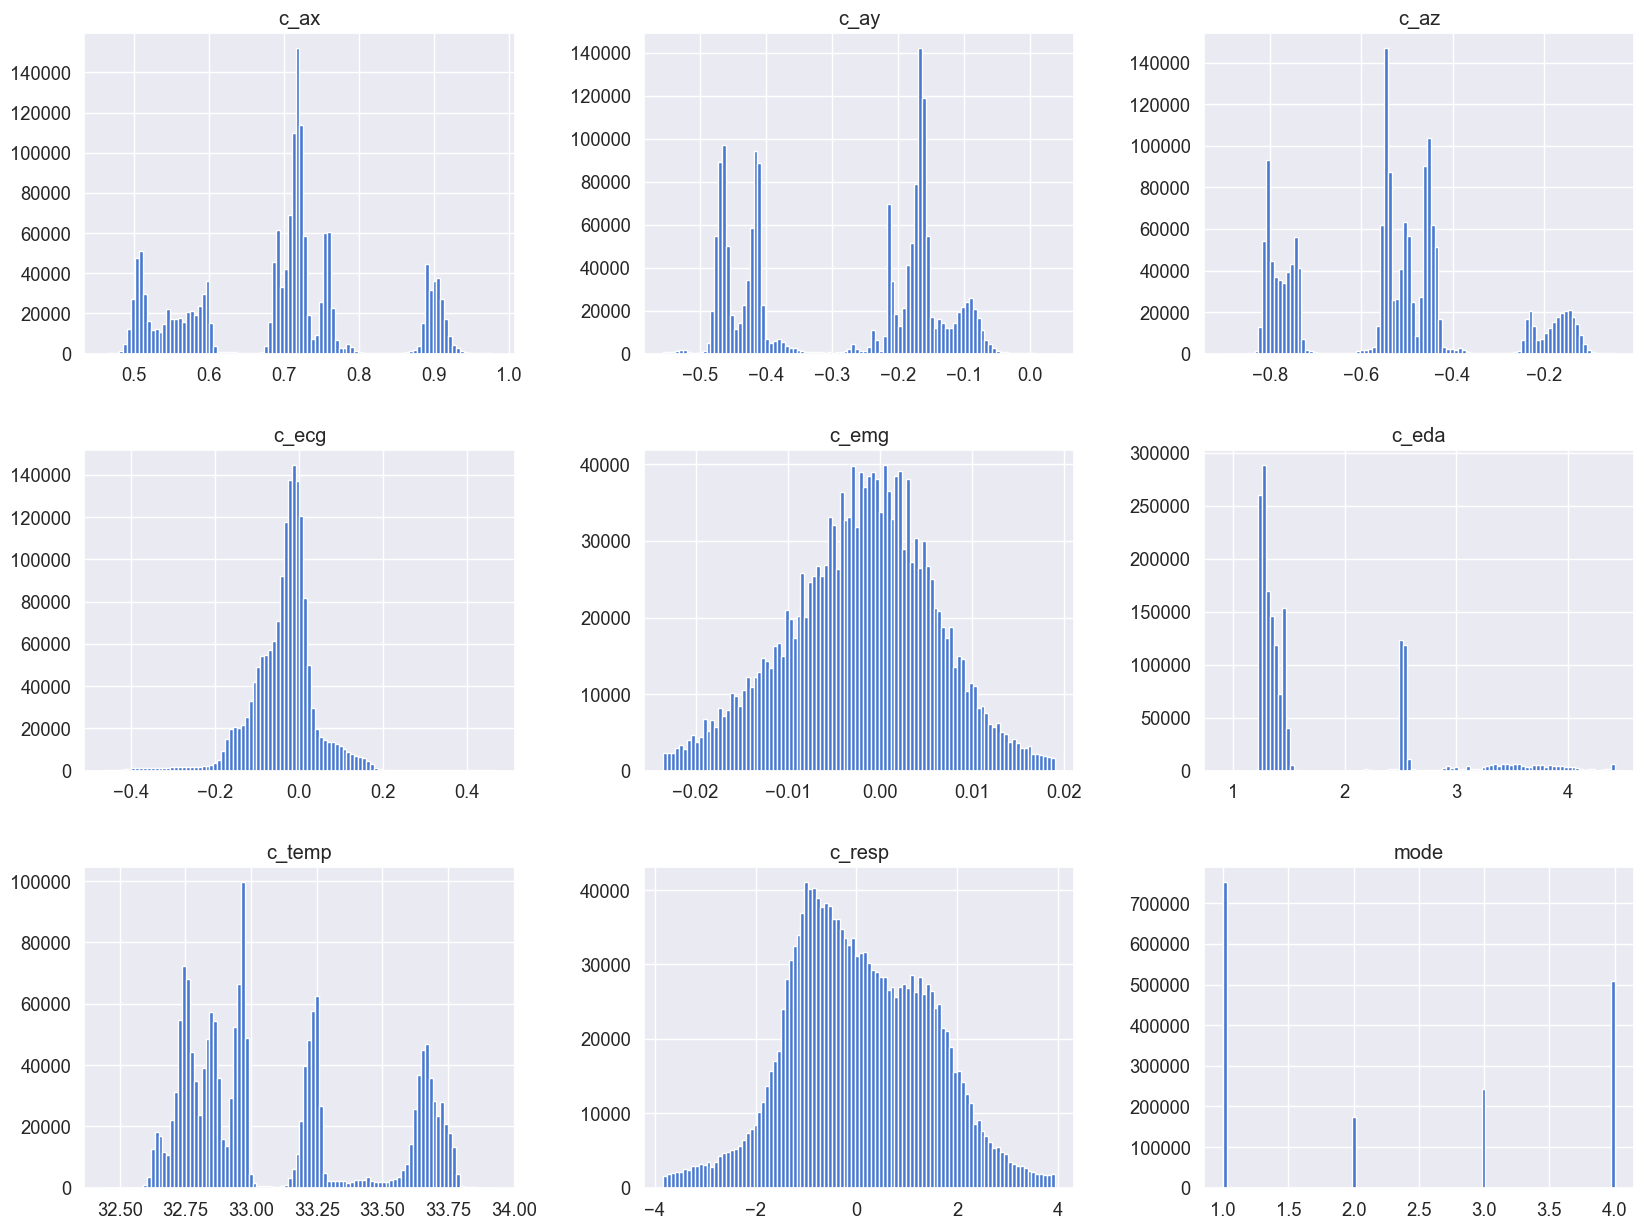

In [36]:
df_chest_filter.hist(bins=100, figsize = (20,15))


#### Correlación de sensor respiban

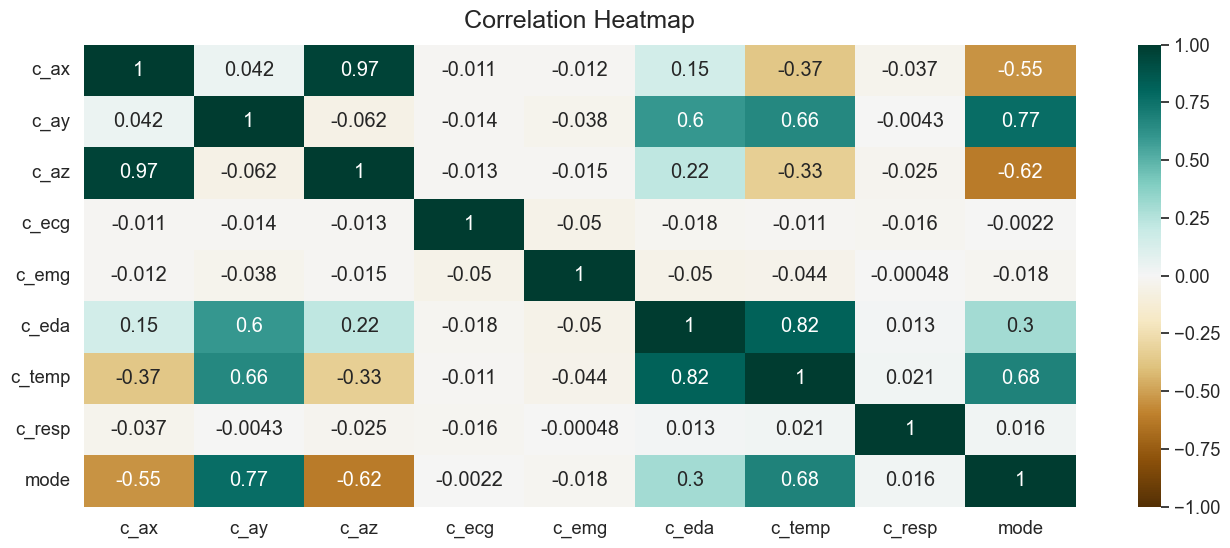

In [46]:

plt.figure(figsize=(16, 6))

corr_matrix=df_chest_filter.corr()
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

#### Correlación de solo estrés contra todas las variables

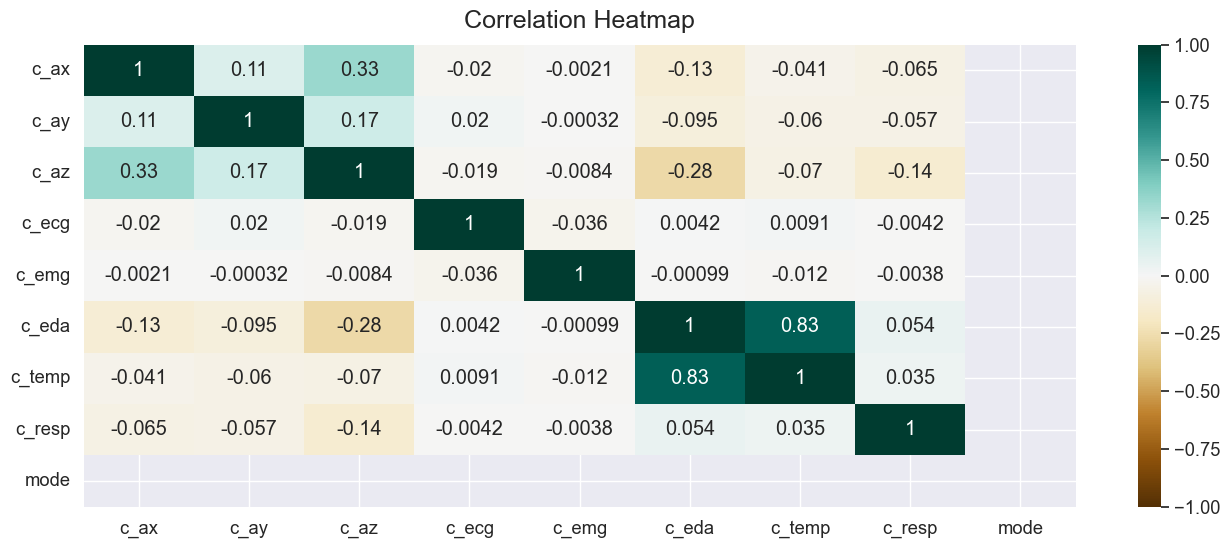

In [47]:

plt.figure(figsize=(16, 6))
corr_matrix_2=df_chest_filter[df_chest_filter["mode"] == 2].corr()
heatmap = sns.heatmap(corr_matrix_2, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Text(0, 0.5, 'sensor amplitude')

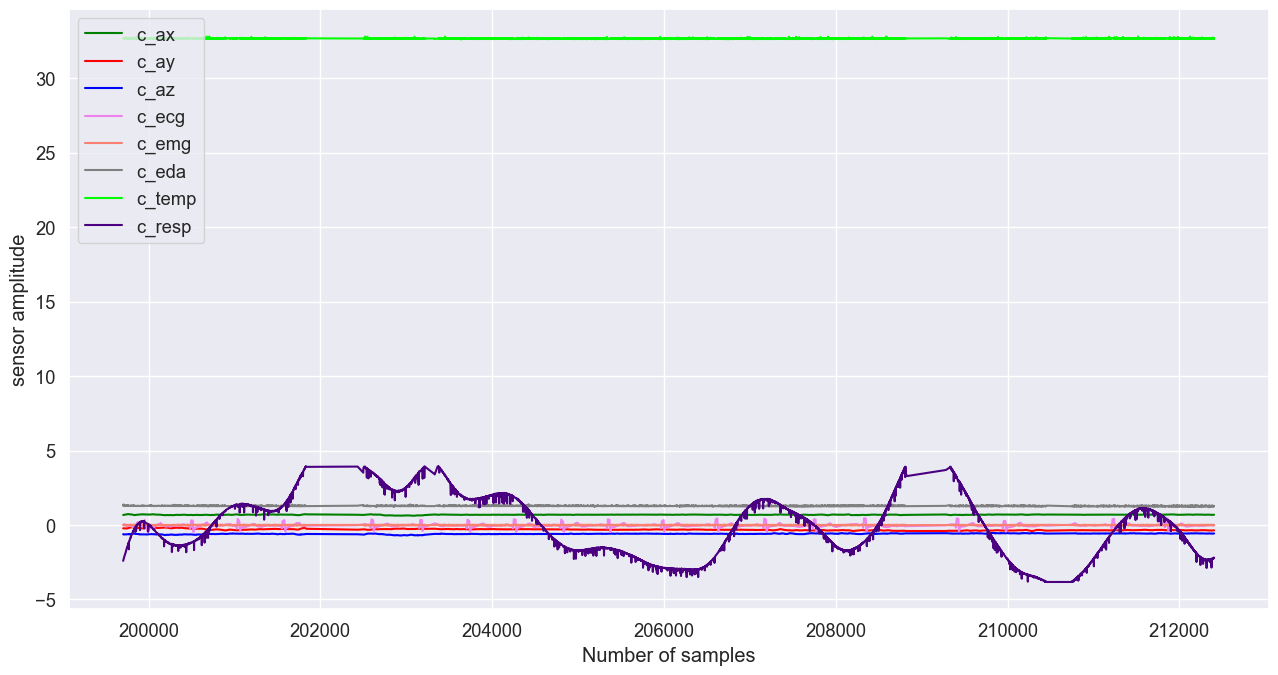

In [54]:
lens=np.arange(len(df_chest_filter['c_ax'][:500]))

fig= plt.figure(figsize=(6,3))
axes= fig.add_axes([0.1,0.1,2,2])

axes.plot(df_chest_filter['c_ax'][:9000],color='green', label="c_ax")
axes.plot(df_chest_filter['c_ay'][:9000],color='red', label="c_ay")
axes.plot(df_chest_filter['c_az'][:9000],color='blue', label="c_az")
axes.plot(df_chest_filter['c_ecg'][:9000],color='violet', label="c_ecg")
axes.plot(df_chest_filter['c_emg'][:9000],color='salmon', label="c_emg")
axes.plot(df_chest_filter['c_eda'][:9000],color='grey', label="c_eda")
axes.plot(df_chest_filter['c_temp'][:9000],color='lime', label="c_temp")
axes.plot(df_chest_filter['c_resp'][:9000],color='indigo', label="c_resp")

plt.legend(loc='upper left')
plt.xlabel("Number of samples")
plt.ylabel("sensor amplitude")
#df_out[:500].plot(kind='line',x='c_ax',y='c_ay',color='green',ax=ax)
#df_out[:500].plot(kind='line',x='c_ax',y='c_az', color='red', ax=ax)

#plt.show()

Text(0, 0.5, 'sensor amplitude')

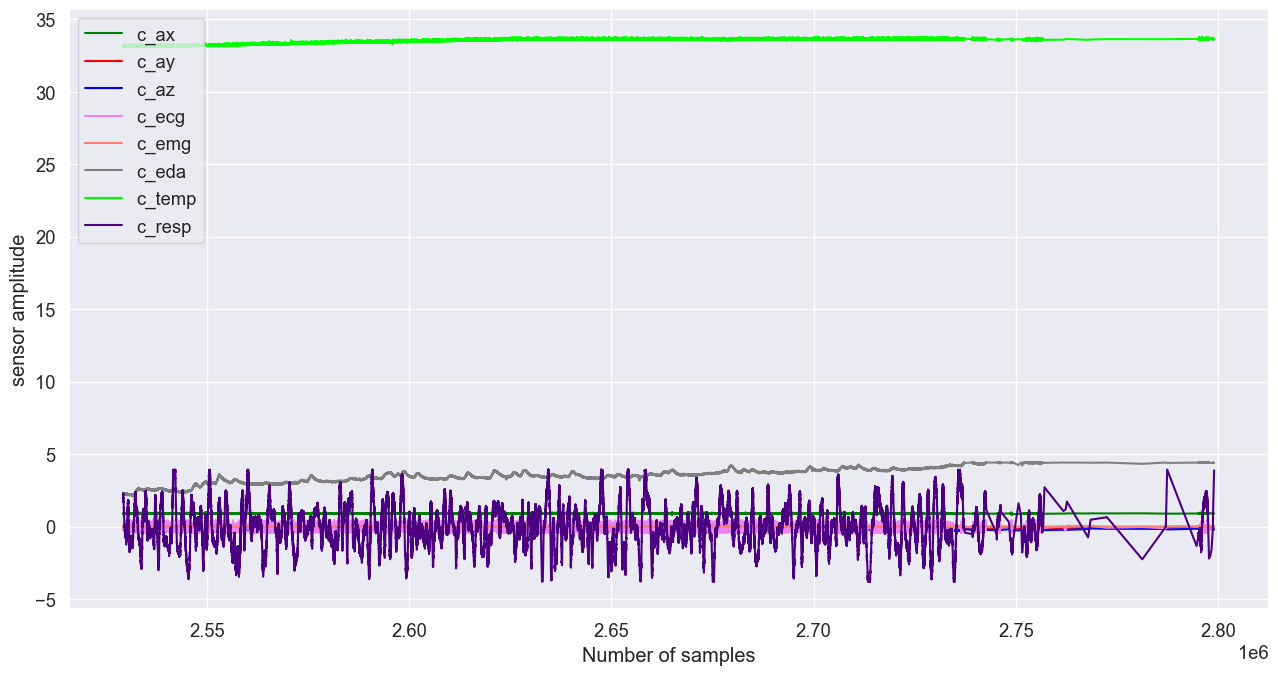

In [58]:
lens=np.arange(len(df_chest_filter[df_chest_filter["mode"] == 2]['c_ax'][:500]))

fig= plt.figure(figsize=(6,3))
axes= fig.add_axes([0.1,0.1,2,2])

axes.plot(df_chest_filter[df_chest_filter["mode"] == 2]['c_ax'],color='green', label="c_ax")
axes.plot(df_chest_filter[df_chest_filter["mode"] == 2]['c_ay'],color='red', label="c_ay")
axes.plot(df_chest_filter[df_chest_filter["mode"] == 2]['c_az'],color='blue', label="c_az")
axes.plot(df_chest_filter[df_chest_filter["mode"] == 2]['c_ecg'],color='violet', label="c_ecg")
axes.plot(df_chest_filter[df_chest_filter["mode"] == 2]['c_emg'],color='salmon', label="c_emg")
axes.plot(df_chest_filter[df_chest_filter["mode"] == 2]['c_eda'],color='grey', label="c_eda")
axes.plot(df_chest_filter[df_chest_filter["mode"] == 2]['c_temp'],color='lime', label="c_temp")
axes.plot(df_chest_filter[df_chest_filter["mode"] == 2]['c_resp'],color='indigo', label="c_resp")

plt.legend(loc='upper left')
plt.xlabel("Number of samples")
plt.ylabel("sensor amplitude")

In [66]:
base_df = df_chest_filter.loc[(df_chest_filter['mode'] == 0)]
stress_df = df_chest_filter.loc[(df_chest_filter['mode'] == 1)]
amus_df = df_chest_filter.loc[(df_chest_filter['mode'] == 2)]
medi_df = df_chest_filter.loc[(df_chest_filter['mode'] == 3)]
y_ax=base_df["c_ax"][:20000].values
y_ax_s=stress_df["c_ax"][:20000].values
y_ax_a=amus_df["c_ax"][:20000].values
y_ax_m=medi_df["c_ax"][:20000].values
x_ax=np.arange(len(y_ax))
len(y_ax)

0


 1000 1000 



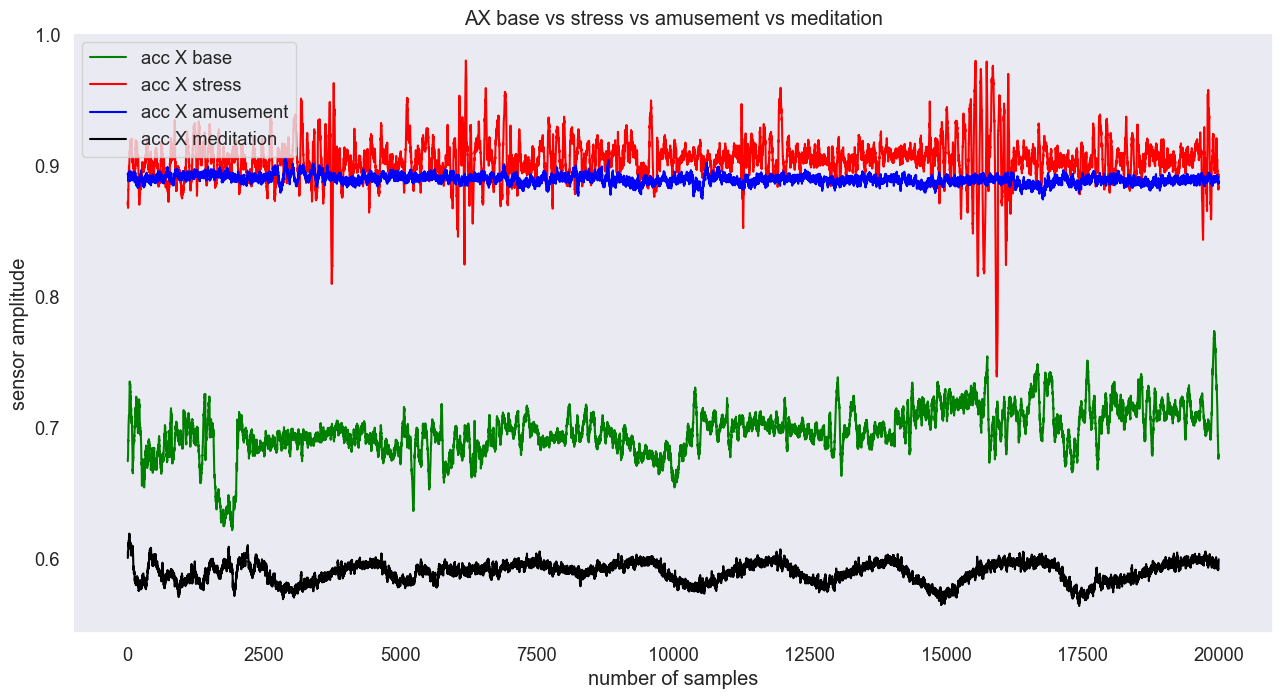

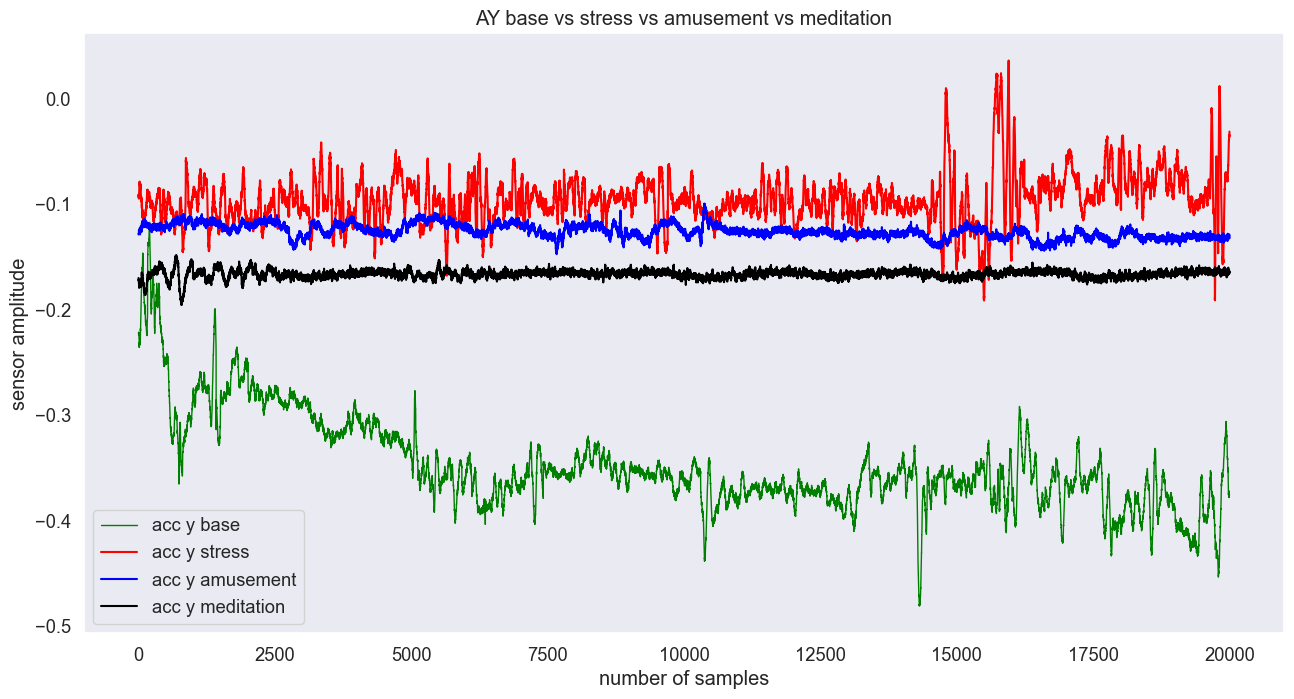

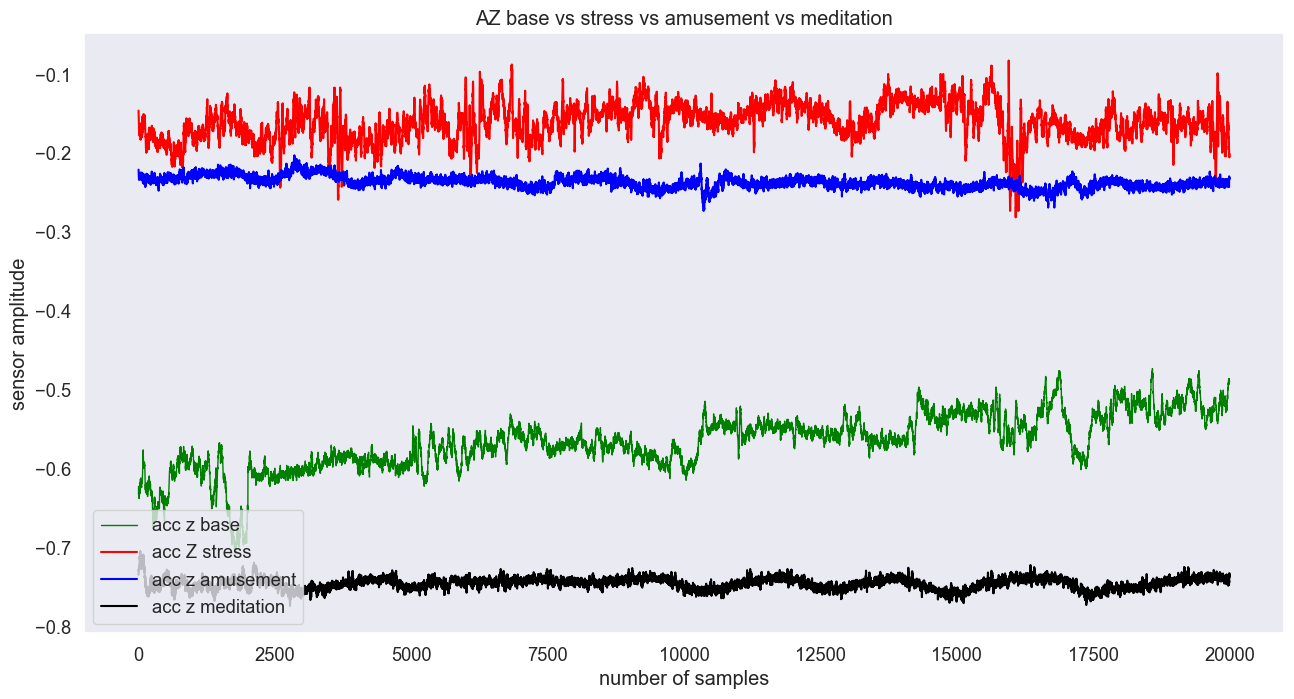

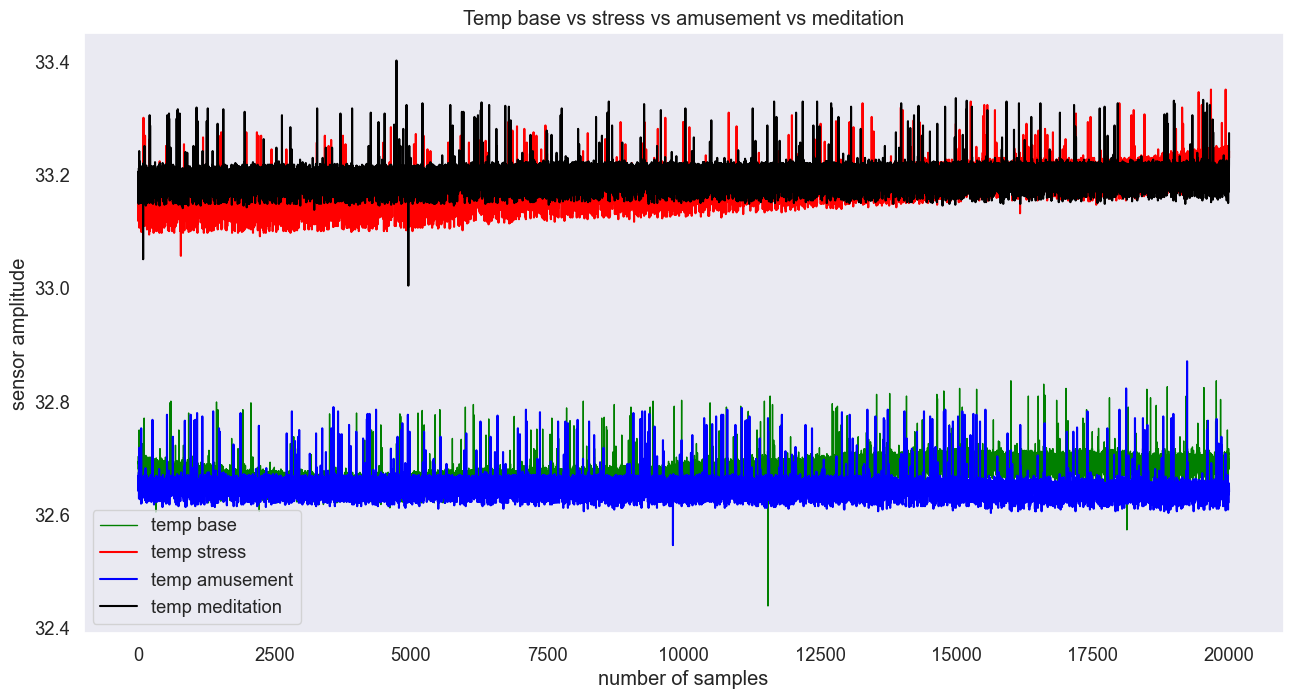

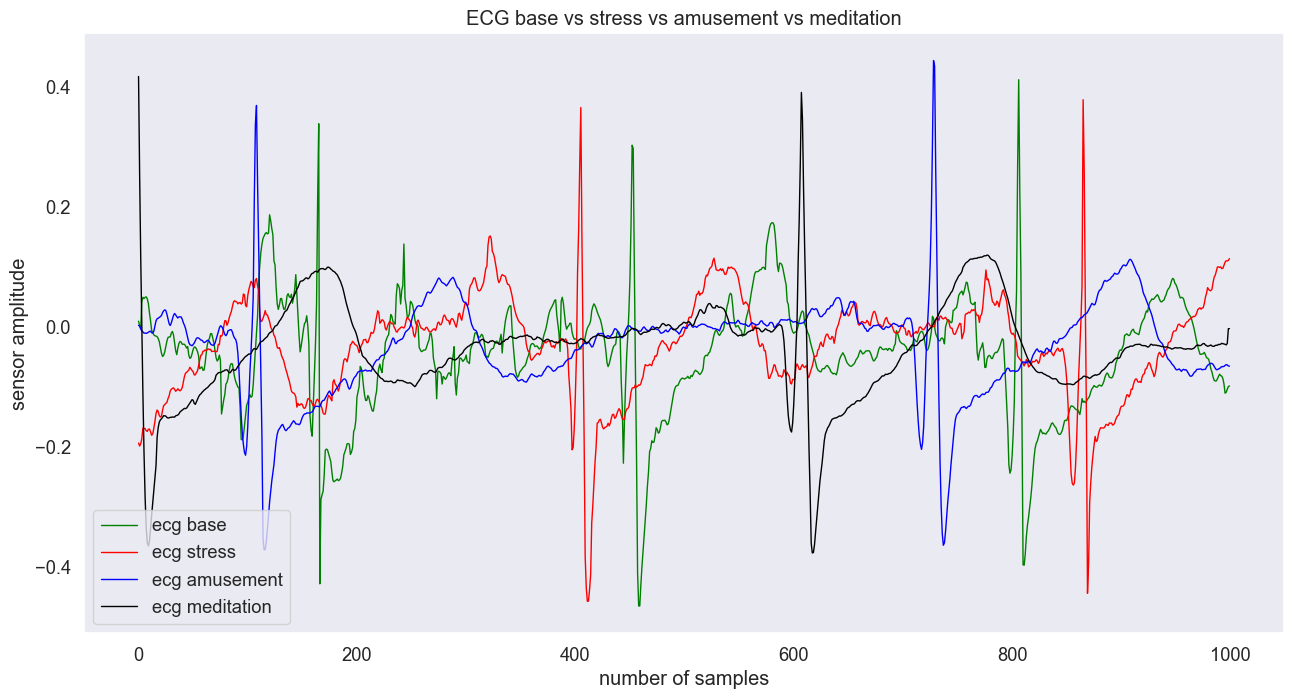

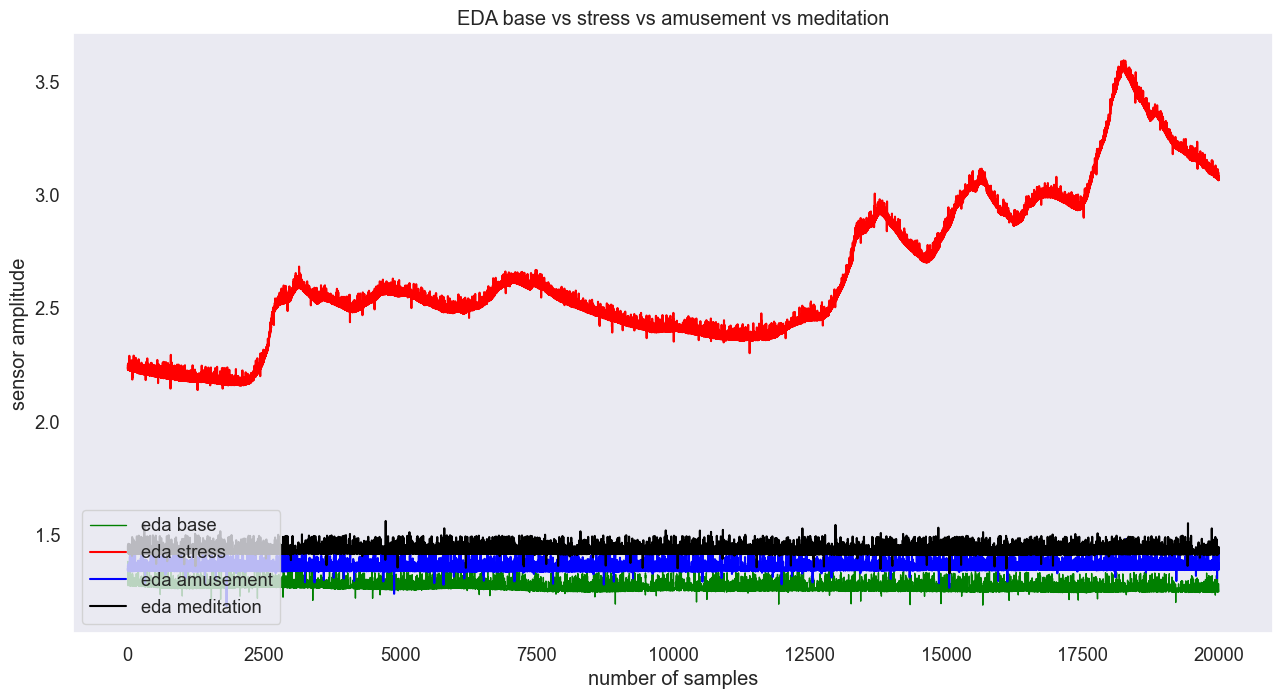

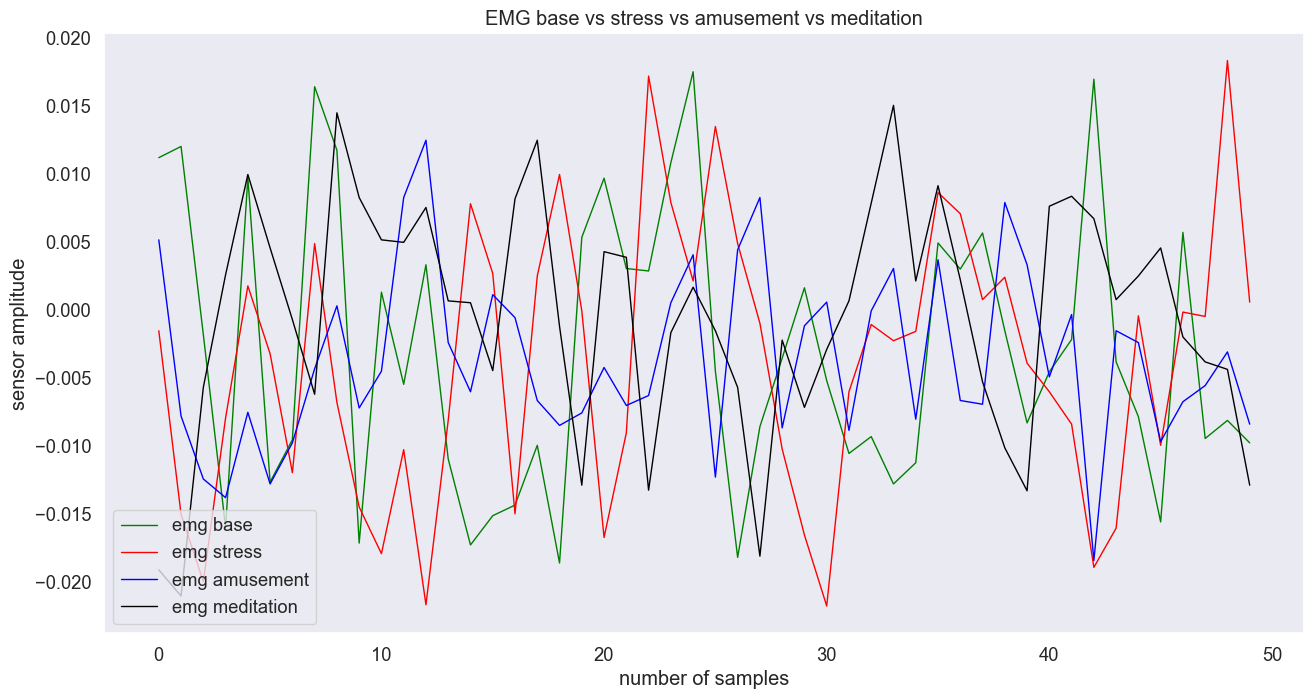

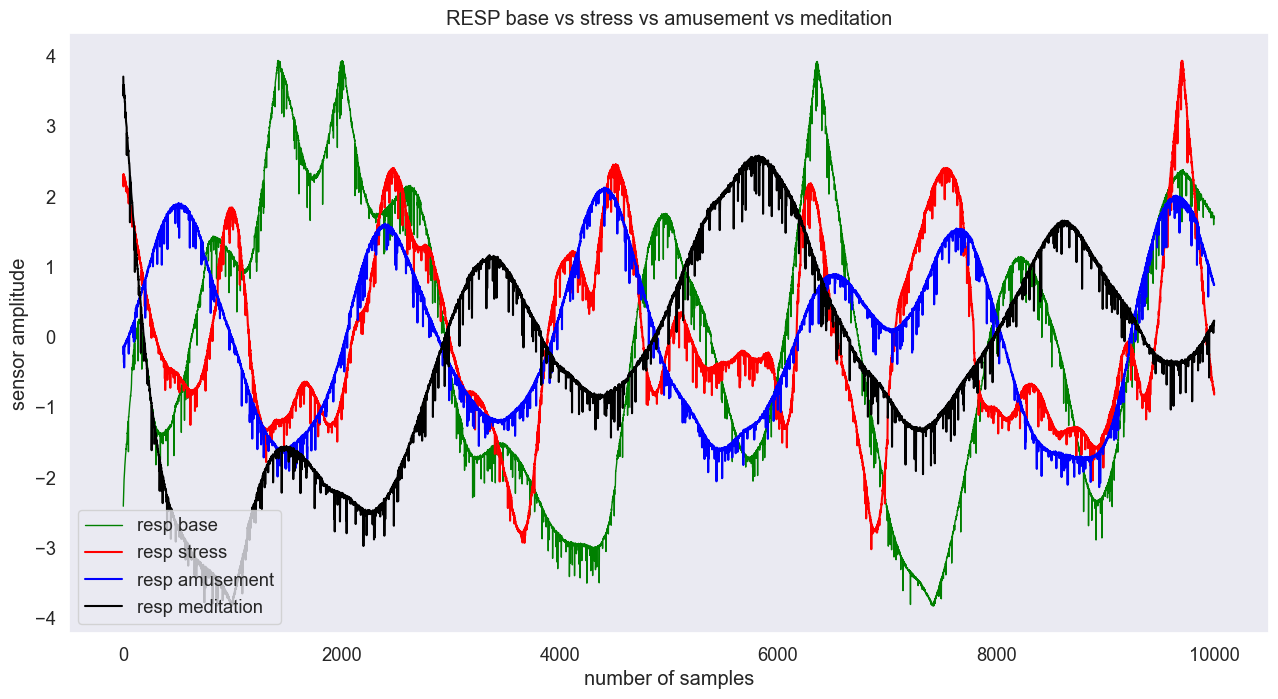

In [68]:
# extract of: https://github.com/aniketphatak09/WESAD/blob/main/WESAD_visualization.ipynb
base_df = df_chest_filter.loc[(df_chest_filter['mode'] == 1)]
stress_df = df_chest_filter.loc[(df_chest_filter['mode'] == 2)]
amus_df = df_chest_filter.loc[(df_chest_filter['mode'] == 3)]
medi_df = df_chest_filter.loc[(df_chest_filter['mode'] == 4)]
y_ax=base_df["c_ax"][:20000].values
y_ax_s=stress_df["c_ax"][:20000].values
y_ax_a=amus_df["c_ax"][:20000].values
y_ax_m=medi_df["c_ax"][:20000].values
x_ax=np.arange(len(y_ax))


y_ay=base_df["c_ay"][:20000].values
y_ay_s=stress_df["c_ay"][:20000].values
y_ay_a=amus_df["c_ay"][:20000].values
y_ay_m=medi_df["c_ay"][:20000].values
x_ay=np.arange(len(y_ay))

y_az=base_df["c_az"][:20000].values
y_az_s=stress_df["c_az"][:20000].values
y_az_a=amus_df["c_az"][:20000].values
y_az_m=medi_df["c_az"][:20000].values
x_az=np.arange(len(y_az))

y_ecg=base_df["c_ecg"][:1000].values
y_ecg_s=stress_df["c_ecg"][:1000].values
y_ecg_a=amus_df["c_ecg"][:1000].values
y_ecg_m=medi_df["c_ecg"][:1000].values
x_ecg=np.arange(len(y_ecg))
print("\n",len(x_ecg),len(y_ecg),"\n")

y_emg=base_df["c_emg"][:50].values
y_emg_s=stress_df["c_emg"][:50].values
y_emg_a=amus_df["c_emg"][:50].values
y_emg_m=medi_df["c_emg"][:50].values
x_emg=np.arange(len(y_emg))

y_eda=base_df["c_eda"][:20000].values
y_eda_s=stress_df["c_eda"][:20000].values
y_eda_a=amus_df["c_eda"][:20000].values
y_eda_m=medi_df["c_eda"][:20000].values
x_eda=np.arange(len(y_eda))

y_temp=base_df["c_temp"][:20000].values
y_temp_s=stress_df["c_temp"][:20000].values
y_temp_a=amus_df["c_temp"][:20000].values
y_temp_m=medi_df["c_temp"][:20000].values
x_temp=np.arange(len(y_temp))

y_resp=base_df["c_resp"][:10000].values
y_resp_s=stress_df["c_resp"][:10000].values
y_resp_a=amus_df["c_resp"][:10000].values
y_resp_m=medi_df["c_resp"][:10000].values
x_resp=np.arange(len(y_resp))

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
#fig1, ax1 = plt.subplots()
ax1.plot(x_ax,y_ax,color='green',label="acc X base")
ax1.plot(x_ax,y_ax_s,color='red',label="acc X stress")
ax1.plot(x_ax,y_ax_a,color='blue',label="acc X amusement")
ax1.plot(x_ax,y_ax_m,color='black',label="acc X meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'AX base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='upper left')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_ax,y_ay,color='green',label="acc y base",linewidth=1)
ax1.plot(x_ax,y_ay_s,color='red',label="acc y stress")
ax1.plot(x_ax,y_ay_a,color='blue',label="acc y amusement")
ax1.plot(x_ax,y_ay_m,color='black',label="acc y meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'AY base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_ax,y_az,color='green',label="acc z base",linewidth = 1)
ax1.plot(x_ax,y_az_s,color='red',label="acc Z stress")
ax1.plot(x_ax,y_az_a,color='blue',label="acc z amusement")
ax1.plot(x_ax,y_az_m,color='black',label="acc z meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'AZ base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_temp,y_temp,color='green',label="temp base",linewidth = 1)
ax1.plot(x_temp,y_temp_s,color='red',label="temp stress")
ax1.plot(x_temp,y_temp_a,color='blue',label="temp amusement")
ax1.plot(x_temp,y_temp_m,color='black',label="temp meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'Temp base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_ecg,y_ecg,color='green',label="ecg base",linewidth = 1)
ax1.plot(x_ecg,y_ecg_s,color='red',label="ecg stress",linewidth = 1)
ax1.plot(x_ecg,y_ecg_a,color='blue',label="ecg amusement",linewidth = 1)
ax1.plot(x_ecg,y_ecg_m,color='black',label="ecg meditation",linewidth = 1)
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'ECG base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_eda,y_eda,color='green',label="eda base",linewidth = 1)
ax1.plot(x_eda,y_eda_s,color='red',label="eda stress")
ax1.plot(x_eda,y_eda_a,color='blue',label="eda amusement")
ax1.plot(x_eda,y_eda_m,color='black',label="eda meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'EDA base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_emg,y_emg,color='green',label="emg base",linewidth = 1)
ax1.plot(x_emg,y_emg_s,color='red',label="emg stress",linewidth = 1)
ax1.plot(x_emg,y_emg_a,color='blue',label="emg amusement",linewidth = 1)
ax1.plot(x_emg,y_emg_m,color='black',label="emg meditation",linewidth = 1)
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'EMG base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_resp,y_resp,color='green',label="resp base",linewidth = 1)
ax1.plot(x_resp,y_resp_s,color='red',label="resp stress")
ax1.plot(x_resp,y_resp_a,color='blue',label="resp amusement")
ax1.plot(x_resp,y_resp_m,color='black',label="resp meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'RESP base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()